In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ising import update_N_epochs, mean_estimates, mean_field
%matplotlib inline
np.set_printoptions(precision=4)

# Gibbs sampling

### First, we run a burn-in period of 1000 epochs

In [2]:
X = np.random.randn(7,7)  # Random initialization
samples = update_N_epochs(1000, X)
mixed_X = samples[-1]

### We collect a sample vector for each of the 5000 subsequent epochs, and we average them toget an estimate of the moments $E[X_s]$

In [3]:
estimated_means = mean_estimates(5000, mixed_X)

In [4]:
print(estimated_means)

[[0.6257 0.9188 0.6617 0.9214 0.6703 0.9148 0.6151]
 [0.9128 0.7035 0.9096 0.6993 0.9062 0.6845 0.9092]
 [0.6603 0.9054 0.6801 0.9086 0.6907 0.9018 0.6601]
 [0.9204 0.6903 0.9122 0.6945 0.91   0.6977 0.915 ]
 [0.6613 0.898  0.6905 0.9068 0.6913 0.9162 0.6747]
 [0.9148 0.6829 0.9038 0.6943 0.9098 0.6949 0.917 ]
 [0.6239 0.9174 0.6599 0.9184 0.6635 0.91   0.6231]]


### We repeat the experiment 10 times, and evaluate the per-node standard deviation of the 10 moment estimates

In [5]:
print(np.std([mean_estimates(5000, mixed_X) for _ in range(10)], 0))

[[0.0101 0.0046 0.0055 0.004  0.0055 0.0028 0.0065]
 [0.0021 0.0065 0.0043 0.0052 0.0045 0.0044 0.0059]
 [0.007  0.0051 0.0084 0.0033 0.0093 0.0049 0.0071]
 [0.005  0.0025 0.003  0.006  0.0038 0.0066 0.0035]
 [0.0051 0.0044 0.0046 0.0019 0.0089 0.0041 0.0045]
 [0.003  0.007  0.003  0.0056 0.0037 0.0067 0.0046]
 [0.0062 0.0039 0.0064 0.0052 0.0057 0.0031 0.0067]]


# Mean-field updates

### We run cyclic coordinate descents on the KL divergence to optimize for the mean field approximation. This yields an approximation of the moments $E[X_s]$

In [6]:
mean_field_estimates, KLs = mean_field()

In [7]:
print(mean_field_estimates)

[[0.6358 0.9215 0.6716 0.9228 0.6716 0.9215 0.6358]
 [0.9215 0.6978 0.9154 0.6974 0.9154 0.6978 0.9215]
 [0.6716 0.9154 0.6967 0.9163 0.6967 0.9154 0.6717]
 [0.9228 0.6974 0.9163 0.6969 0.9163 0.6974 0.9229]
 [0.6716 0.9154 0.6967 0.9163 0.6967 0.9154 0.6717]
 [0.9215 0.6978 0.9154 0.6974 0.9154 0.6978 0.9215]
 [0.6358 0.9215 0.6717 0.9229 0.6717 0.9215 0.6358]]


### During training, we track and plot $KL(q||p) - log(Z_p) = \sum_s H(q_s) - \sum_s \eta_s \tau_s - \sum_{\{s, t\} \in \mathcal{E}} \eta_{s,t} \tau_s \tau_t$

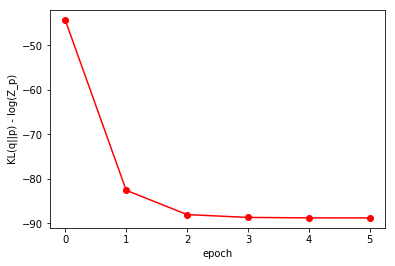

In [8]:
plt.plot(KLs, 'r-o')
plt.xlabel('epoch')
plt.ylabel('KL(q||p) - log(Z_p)')
plt.show()

### We compare with the Gibbs Sampling estimate using the average $l_1$ distance

In [9]:
print(np.mean(np.abs(mean_field_estimates - estimated_means)))

0.007842424118992053


The low value of this average $l_1$ distance suggests that the mean field is a good approximation for the task of estimating the moments. However, we need to try different initializations to confirm this

### We try different initializations

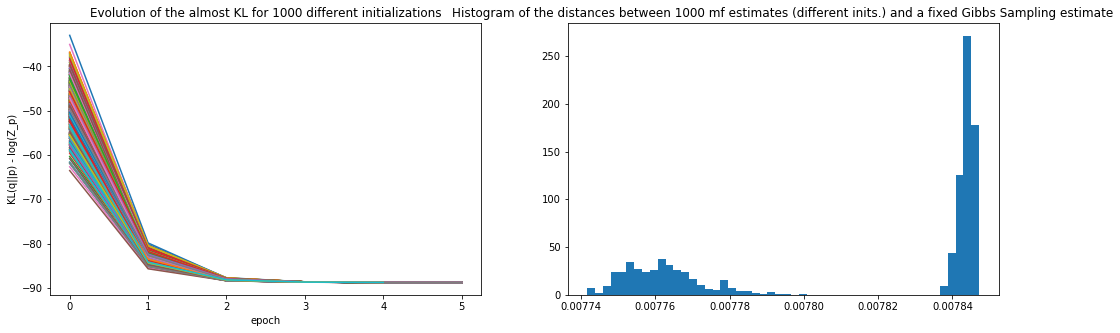

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(17, 5))

distances = []
for _ in range(1000):
    mf_estimates, KLs = mean_field()
    distances.append(np.mean(np.abs(mf_estimates - estimated_means)))
    axes[0].plot(KLs)
    
axes[0].set_title('Evolution of the almost KL for 1000 different initializations')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('KL(q||p) - log(Z_p)')

axes[1].hist(distances, 50)
axes[1].set_title('Histogram of the distances between 1000 mf estimates (different inits.) and a fixed Gibbs Sampling estimate')

plt.show()

All the above distances are lower than 1e-2, and all the 'almost KL divergences' seem to converge after <5 epochs to approximately the same value. This suggests that are no bad local minima. However, the above histogram shows a bi-modal distribution of these distances, which suggests that there might be two local minimas to which the mean field approximation converges to (one flatter than the other), but the values at these minima are really close.